**Dataset:** https://www.kaggle.com/datasets/blastchar/telco-customer-churn

**Context:**

    "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

**Content:**

    Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

**The data set includes information about:**

    Customers who left within the last month – the column is called Churn

    Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

    Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

    Demographic info about customers – gender, age range, and if they have partners and dependents


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('data/Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.shape

(7043, 21)

In [8]:
counts = df['Churn'].value_counts()
print("Non Churn % = {:.2f}".format((counts[0]/df.shape[0])*100))
print("Churn % = {:.2f}".format((counts[1]/df.shape[0])*100))

Non Churn % = 73.46
Churn % = 26.54


<AxesSubplot:xlabel='Churn', ylabel='count'>

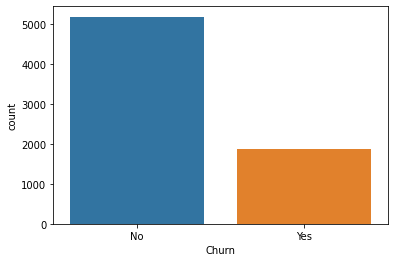

In [9]:
sns.countplot(x='Churn', data=df)

**Observation:**

    Relatively few churned customers.
    Not seriously imbalanced. Oversampling and undersampling will not be considered.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.dtypes.value_counts()

object     18
int64       2
float64     1
dtype: int64

In [12]:
# check unique values of each column
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [13]:
# check unique values of each column
for column in df.columns:
    print('{}:\t {} Unique Values:\t{}'.format(column, df[column].nunique(), df[column].unique()))

customerID:	 7043 Unique Values:	['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:	 2 Unique Values:	['Female' 'Male']
SeniorCitizen:	 2 Unique Values:	[0 1]
Partner:	 2 Unique Values:	['Yes' 'No']
Dependents:	 2 Unique Values:	['No' 'Yes']
tenure:	 73 Unique Values:	[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:	 2 Unique Values:	['No' 'Yes']
MultipleLines:	 3 Unique Values:	['No phone service' 'No' 'Yes']
InternetService:	 3 Unique Values:	['DSL' 'Fiber optic' 'No']
OnlineSecurity:	 3 Unique Values:	['No' 'Yes' 'No internet service']
OnlineBackup:	 3 Unique Values:	['Yes' 'No' 'No internet service']
DeviceProtection:	 3 Unique Values:	['No' 'Yes' 'No internet service']
TechSupport:	 3 Unique Values:	['No' 'Yes' 'No internet service']
StreamingTV:	 3 Uniq

**Observations:**

1. We will remove the column `customerID` as it is a unique value and not helpful for training. <br>
2. The column `TotalCharges` was wrongly detected as an object. <br>
   This column represents the total amount charged to the customer and it is, therefore, a numeric variable. <br>
   For further analysis, we need to transform this column into a numeric data type. <br>
3. `PaymentMethod` column contain `(automatic)` to couple of it's categories which is adding no special meaning to those and unnecessarily making the name long. Therefore, we remove this additional information from the entries of the PaymentMethod column.

In [14]:
# drop the customerID column from the dataset
df.drop(columns='customerID', inplace=True)

In [15]:
# transform the column TotalCharges into a numeric data type
# To do so, we can use the pd.to_numeric function. 
# By default, this function raises an exception when it sees non-numeric data; 
# however, we can use the argument errors='coerce' to skip those cases and replace them with a NaN.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [16]:
df['TotalCharges'].dtype

dtype('float64')

In [17]:
# remove `(automatic)` from payment method names
df['PaymentMethod'].str.replace(' (automatic)', '', regex=False).unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [18]:
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

In [19]:
# Checking for missing values
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**Observation:**

- Column `TotalCharges` has 11 missing values.
- Need to analyze these 11 records.

In [20]:
df[df['TotalCharges'].isna()][['tenure','MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


**Observations:**

    Tenure is 0 while MontlyCharges is not null and when MontlyCharges is not null TotalCharges is Nan.
    This appeared to be contradictory, therefore, we should remove these observations from the data set.

In [21]:
# drop observations with null values in TotalCharges column
df.dropna(inplace=True)

In [22]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
df.shape

(7032, 20)

In [24]:
# Checking for duplicates
df.duplicated().sum()

22

**Observation:**

    There are 22 duplicate records.
    We need to remove these duplicate records from the dataset.

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.duplicated().sum()

0

**100% stacked bar plot for all demographic features together:** 
Gender, SeniorCitizen, Partner, Dependents

In [27]:
df[['gender', 'SeniorCitizen', 'Partner', 'Dependents']].dtypes

gender           object
SeniorCitizen     int64
Partner          object
Dependents       object
dtype: object

In [28]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='gender', ylabel='count'>

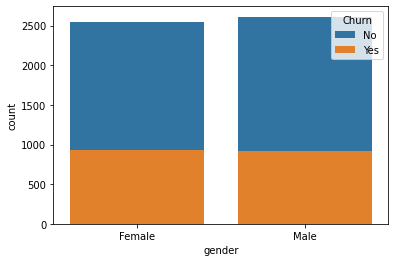

In [29]:
sns.countplot(x='gender', data=df, hue='Churn', dodge=False)

In [30]:
pd.crosstab(df['gender'], df['Churn'])

Churn,No,Yes
gender,,
Female,2541,934
Male,2612,923


In [31]:
pd.crosstab(df['gender'], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

Churn,No,Yes
gender,,
Female,73.122302,26.877698
Male,73.889675,26.110325


<AxesSubplot:xlabel='gender'>

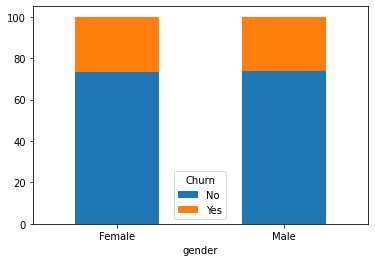

In [32]:
# calculate the percentage of observations of the response variable for each group of the independent variable
# 100% stacked bar plot
gender_churn_ct = pd.crosstab(df['gender'], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)
gender_churn_ct.plot(kind='bar', stacked=True, rot=0) # rot=0 -> to rotate the x-ticks lables

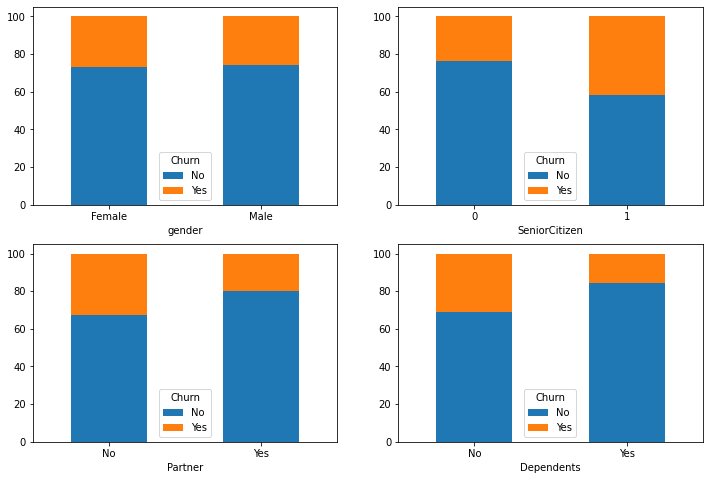

In [33]:
# create the subplot
fig = plt.figure(figsize=(12,8))

for index, col in enumerate(['gender', 'SeniorCitizen', 'Partner', 'Dependents'], 1):
    ax = fig.add_subplot(2, 2, index)
    cross_tab = pd.crosstab(df[col], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)
    cross_tab.plot(kind='bar',ax=ax, stacked=True, rot=0) 


**Obervations:**
- We do not expect gender to have significant predictive power. A similar percentage of churn is shown both when a customer is a man or a woman.
- The churn rate of senior citizens is almost double that of young citizens.
- Customers with a partner churn less than customers with no partner.
- Customers with dependents churn less than customers with no dependents.

**100% stacked bar plot for all Services related features:**
phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

In [34]:
service_features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [35]:
df[service_features].dtypes

PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
dtype: object

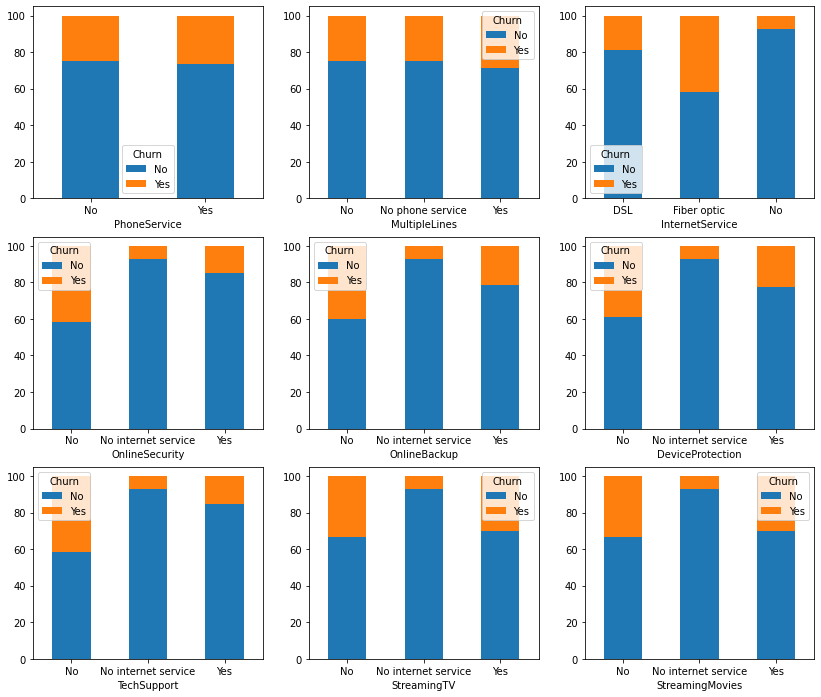

In [36]:
# create the subplot
fig = plt.figure(figsize=(14,12))

for index, col in enumerate(service_features, 1):
    ax = fig.add_subplot(3, 3, index)
    cross_tab = pd.crosstab(df[col], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)
    cross_tab.plot(kind='bar',ax=ax, stacked=True, rot=0) 


**Observations:**
- We do not expect phone attributes (PhoneService and MultipleLines) to have significant predictive power. The percentage of churn for all classes in both independent variables is nearly the same.
- Clients with online security churn less than those without it.
- Customers with no tech support tend to churn more often than those with tech support.

**100% stacked bar plot for all account information related features:** 
how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

In [37]:
account_info_features = ['tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

In [38]:
df[account_info_features].dtypes

tenure                int64
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [39]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

**Categorical:**

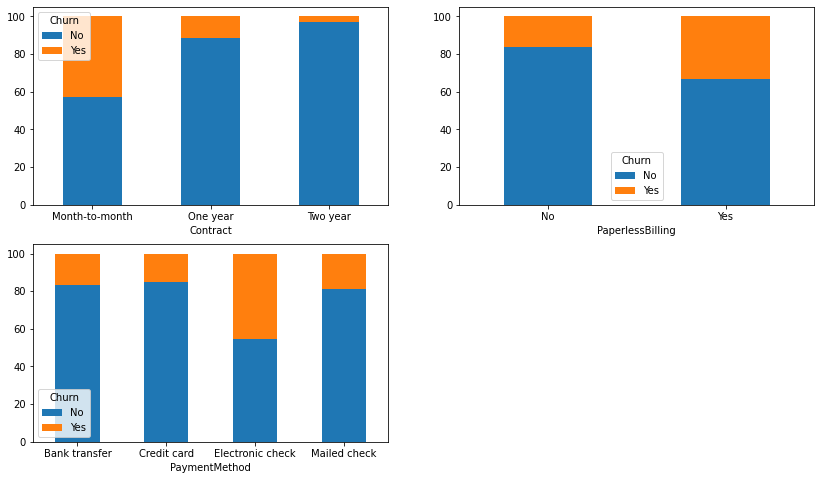

In [40]:
# create the subplot
fig = plt.figure(figsize=(14,8))

for index, col in enumerate(['Contract', 'PaperlessBilling', 'PaymentMethod'], 1):
    ax = fig.add_subplot(2, 2, index)
    cross_tab = pd.crosstab(df[col], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)
    cross_tab.plot(kind='bar',ax=ax, stacked=True, rot=0) 

**Observations:**
- Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts.
- Customers who opted for an electronic check as paying method are more likely to leave the company.
- Customers subscribed to paperless billing churn more than those who are not subscribed.

**Numerical:**

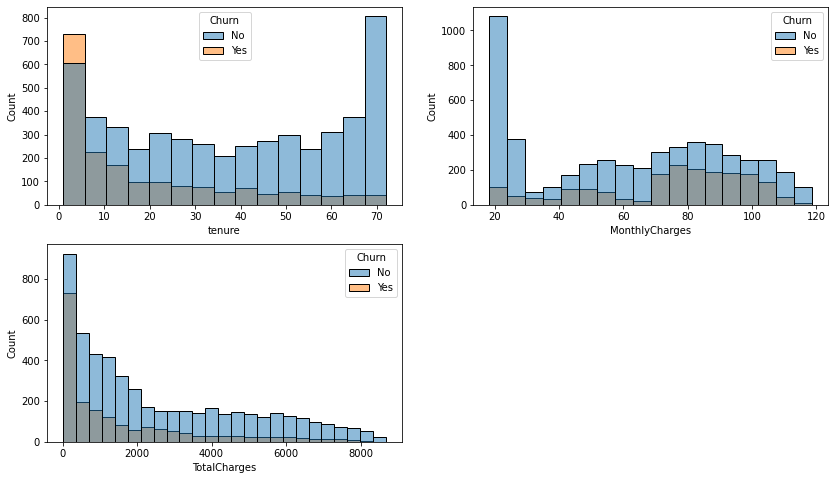

In [41]:
# create the subplot
fig = plt.figure(figsize=(14,8))

for index, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges'], 1):
    ax = fig.add_subplot(2, 2, index)
    sns.histplot(data=df, x=col, hue='Churn')

**Observations:**
- The churn rate tends to be larger when monthly charges are high.
- New customers (low tenure) are more likely to churn.
- Clients with high total charges are less likely to leave the company.

By looking at the plots above, we can identify the most relevant attributes for detecting churn. We expect these attributes to be discriminative in our future models.

In [42]:
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder # This only handels single variable at a time.
from feature_engine.encoding import OrdinalEncoder
from feature_engine.encoding import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import xgboost as xgb

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

The Mutual Information is a measure of the similarity between two labels of the same data.

Mutual information allows us not only to better understand our data but also to identify the predictor variables that are completely independent of the target. 

```
cat_cols = df.columns[(df.dtypes != np.float64)]
cat_cols = np.where([(df.dtypes != np.float64)])[0]
```

In [43]:
# function that computes the mutual infomation score between a categorical serie and the column Churn
def compute_mutual_information(col):
    return mutual_info_score(col, df.Churn)

In [44]:
# compute the mutual information score between each categorical variable and the target
feature_importance = df.select_dtypes(exclude=float).drop('Churn', axis=1).apply(compute_mutual_information).sort_values(ascending=False)

In [45]:
feature_importance

Contract            0.098031
tenure              0.078687
OnlineSecurity      0.064617
TechSupport         0.062960
InternetService     0.055676
OnlineBackup        0.046743
PaymentMethod       0.044250
DeviceProtection    0.043883
StreamingMovies     0.032150
StreamingTV         0.032041
PaperlessBilling    0.018934
Dependents          0.014131
Partner             0.011180
SeniorCitizen       0.010629
MultipleLines       0.000874
PhoneService        0.000062
gender              0.000038
dtype: float64

<AxesSubplot:>

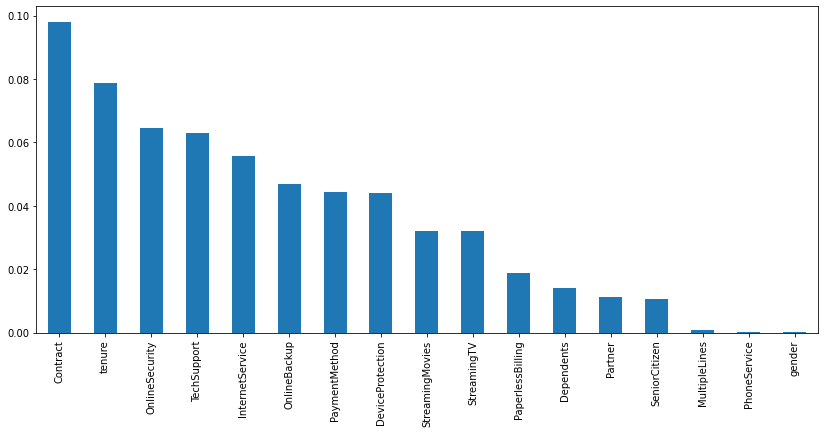

In [46]:
plt.figure(figsize=(14,6))
feature_importance.plot(kind='bar')

**Observation:**
- As shown above, gender, PhoneService, and MultipleLines have a mutual information score really close to 0, meaning those variables do not have a strong relationship with the target.

In [47]:
# min-max normalization (numeric variables)
min_max_feat = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [48]:
# scale numerical variables using min max scaler
for column in min_max_feat:
        # minimum value of the column
        min_column = df[column].min()
        # maximum value of the column
        max_column = df[column].max()
        # min max scaler
        df[column] = (df[column] - min_column) / (max_column - min_column)  

In [49]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,0.000000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,0.001275,No
1,Male,0,No,No,0.464789,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.385075,0.215867,No
2,Male,0,No,No,0.014085,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,0.010310,Yes
3,Male,0,No,No,0.619718,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,0.239303,0.210241,No
4,Female,0,No,No,0.014085,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,0.015330,Yes


In [50]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [51]:
# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Churn']), df['Churn'], test_size=0.3, random_state=32)

In [52]:
X_train.shape, X_test.shape

((4907, 19), (2103, 19))

In [53]:
y_train.head()

5810    1
5521    0
6570    0
899     0
4567    0
Name: Churn, dtype: int64

In [54]:
y_test.head()

1104    0
2463    0
1323    0
5102    0
1621    1
Name: Churn, dtype: int64

In [55]:
# Keeping in mind that we need to capture the impact of each category of each feature 
label_encode_feat = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
one_hot_feat = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

In [56]:
label_encoder = OrdinalEncoder(
    encoding_method='arbitrary', # for ordered need to provide y Series to Fit
    variables=label_encode_feat) # we can select which variables to encode

label_encoder.fit(X_train)

OrdinalEncoder(encoding_method='arbitrary',
               variables=['gender', 'Partner', 'Dependents', 'PhoneService',
                          'PaperlessBilling'])

In [57]:
label_encoder.encoder_dict_

{'gender': {'Female': 0, 'Male': 1},
 'Partner': {'Yes': 0, 'No': 1},
 'Dependents': {'Yes': 0, 'No': 1},
 'PhoneService': {'Yes': 0, 'No': 1},
 'PaperlessBilling': {'Yes': 0, 'No': 1}}

In [58]:
X_train = label_encoder.transform(X_train)
X_test = label_encoder.transform(X_test)

In [59]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5810,0,0,0,0,0.225352,0,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,0,Electronic check,0.668657,0.165336
5521,1,0,1,1,0.816901,0,No,DSL,No,No,Yes,Yes,Yes,No,Month-to-month,0,Electronic check,0.461692,0.428877
6570,0,0,1,1,0.042254,1,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,0,Mailed check,0.108458,0.010530
899,1,0,0,1,0.690141,0,Yes,Fiber optic,Yes,Yes,No,No,No,Yes,Month-to-month,0,Credit card,0.757711,0.564978
4567,1,0,1,1,0.464789,0,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,0,Electronic check,0.866667,0.406399


In [60]:
one_hot_enc = OneHotEncoder(
    top_categories=None,
    variables=one_hot_feat,  # we can select which variables to encode
    drop_last=True)  # to return k-1, false to return k

one_hot_enc.fit(X_train.fillna('Missing'))

OneHotEncoder(drop_last=True,
              variables=['MultipleLines', 'InternetService', 'OnlineSecurity',
                         'OnlineBackup', 'DeviceProtection', 'TechSupport',
                         'StreamingTV', 'StreamingMovies', 'Contract',
                         'PaymentMethod'])

In [61]:
X_train = one_hot_enc.transform(X_train.fillna('Missing'))
X_test = one_hot_enc.transform(X_test.fillna('Missing'))

In [62]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_Yes,MultipleLines_No,InternetService_Fiber optic,InternetService_DSL,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_Yes,StreamingMovies_No,Contract_Month-to-month,Contract_One year,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Credit card
5810,0,0,0,0,0.225352,0,0,0.668657,0.165336,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0
5521,1,0,1,1,0.816901,0,0,0.461692,0.428877,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0
6570,0,0,1,1,0.042254,1,0,0.108458,0.010530,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0
899,1,0,0,1,0.690141,0,0,0.757711,0.564978,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1
4567,1,0,1,1,0.464789,0,0,0.866667,0.406399,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0


In [63]:
lr_model = LogisticRegression(random_state=32)
knn_model = KNeighborsClassifier(n_neighbors=7)
svc_model = SVC(random_state=32)
rf_model = RandomForestClassifier(random_state=32)
gb_model = GradientBoostingClassifier(random_state=32)

In [64]:
models = [('Logistic Regression', lr_model),
          ('K Nearest Neighbors', knn_model),
          ('Support Vector', svc_model),
          ('Random Forest', rf_model),
          ('Gradient Boosting', gb_model)]

In [65]:
for label, model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print("\n")
    print(label,": ")
    print("Confusion Matrix: \n", cm)
    print("Accuracy: {:.2f}; Precision: {:.2f}; Recall: {:.2f}".format(accuracy, precision, recall))



Logistic Regression : 
Confusion Matrix: 
 [[1382  153]
 [ 260  308]]
Accuracy: 0.80; Precision: 0.67; Recall: 0.54


K Nearest Neighbors : 
Confusion Matrix: 
 [[1324  211]
 [ 260  308]]
Accuracy: 0.78; Precision: 0.59; Recall: 0.54


Support Vector : 
Confusion Matrix: 
 [[1395  140]
 [ 295  273]]
Accuracy: 0.79; Precision: 0.66; Recall: 0.48


Random Forest : 
Confusion Matrix: 
 [[1365  170]
 [ 295  273]]
Accuracy: 0.78; Precision: 0.62; Recall: 0.48


Gradient Boosting : 
Confusion Matrix: 
 [[1379  156]
 [ 271  297]]
Accuracy: 0.80; Precision: 0.66; Recall: 0.52


In [66]:
xgb_params = {
    'max_depth':3, 
    'eta':0.01, 
    'silent':0, 
    'eval_metric':'auc',
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective':'binary:logistic',
    'seed' : 32
}

dtrain = xgb.DMatrix(X_train, y_train, feature_names=X_train.columns.values)
dtest = xgb.DMatrix(X_test, y_test, feature_names=X_test.columns.values)

evals = [(dtrain,'train'),(dtest,'eval')]

xgb_model = xgb.train ( params = xgb_params,
              dtrain = dtrain,
              num_boost_round = 1000,
              verbose_eval=200, 
              early_stopping_rounds = 500,
              evals=evals,
              maximize = True)

[00:41:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.79650	eval-auc:0.77650
[200]	train-auc:0.85624	eval-auc:0.84014
[400]	train-auc:0.86472	eval-auc:0.84498
[600]	train-auc:0.87028	eval-auc:0.84650
[800]	train-auc:0.87521	eval-auc:0.84633
[999]	train-auc:0.87981	eval-auc:0.84599


In [67]:
# Confusion matrix
pred = xgb_model.predict(dtest)
pred = [1 if p > 0.5 else 0 for p in pred]

cm = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
print("Confusion Matrix: \n", cm)
print("Accuracy: {:.2f}; Precision: {:.2f}; Recall: {:.2f}".format(accuracy, precision, recall))

Confusion Matrix: 
 [[1389  146]
 [ 269  299]]
Accuracy: 0.80; Precision: 0.67; Recall: 0.53


In [68]:
# get dataframe version of important feature for model 
xgb_feat_imp=pd.DataFrame(list(xgb_model.get_fscore().items()),
                         columns=['feature','importance']).sort_values('importance', ascending=False)
xgb_feat_imp

,feature,importance
7,MonthlyCharges,1637.0
8,TotalCharges,1409.0
4,tenure,1045.0
25,Contract_Month-to-month,246.0
27,PaymentMethod_Electronic check,231.0
26,Contract_One year,223.0
6,PaperlessBilling,196.0
13,OnlineSecurity_No,187.0
1,SeniorCitizen,163.0
0,gender,156.0


# Hyperparameter tuning for GradientBoosting

In [69]:
# define the parameter grid
grid_parameters = {'n_estimators': [80, 90, 100, 110, 115, 120],
                   'max_depth': [3, 4, 5, 6, 7],
                   'max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'min_samples_split': [2, 3, 4, 5]}


# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=32),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=50,
                                   n_jobs=-1)

# fitting the model for random search 
random_search.fit(X_train, y_train)

# print best parameter after tuning
print(random_search.best_params_)

{'n_estimators': 90, 'min_samples_split': 4, 'max_features': 'auto', 'max_depth': 3}


In [70]:
# Confusion matrix
pred = random_search.predict(X_test)

cm = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
print("Confusion Matrix: \n", cm)
print("Accuracy: {:.2f}; Precision: {:.2f}; Recall: {:.2f}".format(accuracy, precision, recall))

Confusion Matrix: 
 [[1382  153]
 [ 268  300]]
Accuracy: 0.80; Precision: 0.66; Recall: 0.53
